Kaiburr - Assessment

Author-Logeshwar B S


Task 5. Data Science example.
Perform a Text Classification on consumer complaint dataset
(https://catalog.data.gov/dataset/consumer-complaint-database) into following categories.
0 Credit reporting, repair, or
other
1 Debt collection
2 Consumer Loan
3 Mortgage
Steps to be followed -
1. Explanatory Data Analysis and Feature Engineering
2. Text Pre-Processing
3. Selection of Multi Classification model
4. Comparison of model performance
5. Model Evaluation
6. Prediction

Models chosen to compare 

Machine Learning Models                                                     Deep Learning Models
                                         
Linear Support Vector Machine (LinearSVM)                                   LSTM
Logistic Regression                                                         Deep Neural Networks
Random Forest                                                               Cnvoutional Neural Network 
Multinomial Naive Bayes                                                     Custom Neural Network


In [1]:

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report





In [2]:
# Cell 2: Load the Dataset
file_path = "complaints.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Display the first 5 rows to inspect the dataset
df.head()


C:\Users\loges\AppData\Local\Temp\ipykernel_12388\1482489021.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-01-29,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,NY,12543,NaN,NaN,Web,2025-01-29,In progress,Yes,NaN,11825440
1,2025-01-31,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",OH,43207,NaN,NaN,Web,2025-01-31,In progress,Yes,NaN,11844238
2,2025-01-30,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,NV,89148,NaN,NaN,Web,2025-01-30,In progress,Yes,NaN,11844247
3,2025-01-29,"Payday loan, title loan, personal loan, or adv...",Installment loan,Problem when making payments,NaN,NaN,NaN,TD BANK US HOLDING COMPANY,FL,33055,NaN,NaN,Phone,2025-02-04,In progress,Yes,NaN,11824206
4,2025-01-28,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,Trying to communicate with the company to fix ...,NaN,NaN,"NEXA Mortgage, LLC",CA,95370,NaN,NaN,Phone,2025-02-06,In progress,Yes,NaN,11805339


checking for missing values in the dataset by using df.isnull().sum(). This function scans each column in the DataFrame and counts the number of missing (NaN) values. The results are stored in the variable missing_values

In [3]:
# Cell 3: Check for Missing Values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)



Missing Values in Each Column:
 Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        815047
Consumer complaint narrative    5329949
Company public response         3936500
Company                               0
State                             51283
ZIP code                          30228
Tags                            7260450
Consumer consent provided?      1431385
Submitted via                         0
Date sent to company                  0
Company response to consumer         20
Timely response?                      0
Consumer disputed?              7074248
Complaint ID                          0
dtype: int64


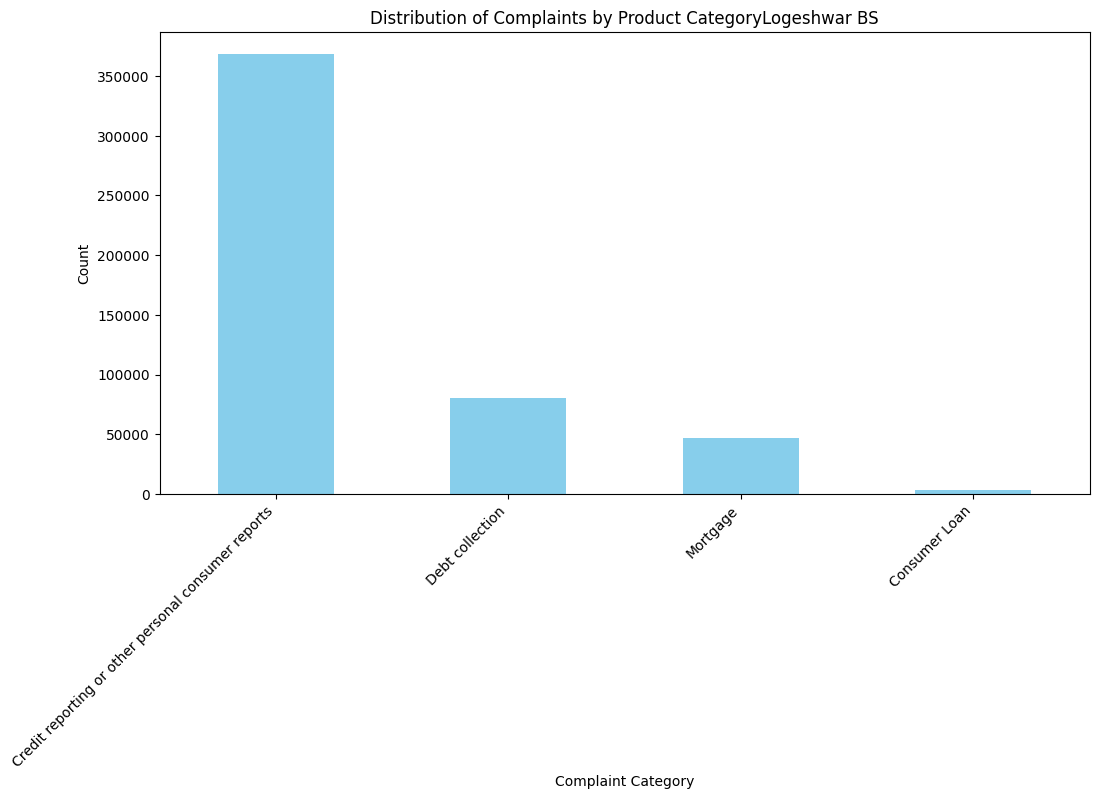

In [21]:
# Cell 4: Distribution of Complaints by Category
plt.figure(figsize=(12, 6))
df["Product"].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel("Complaint Category")
plt.ylabel("Count")
plt.title("Distribution of Complaints by Product Category" + "Logeshwar BS")
plt.xticks(rotation=45, ha="right")
plt.show()


 filtered the dataset to retain only four specific complaint categories: "Credit reporting or other personal consumer reports," "Debt collection," "Consumer Loan," and "Mortgage."

In [5]:
# Cell 5: Keep Only the Four Specified Categories
selected_categories = [
    "Credit reporting or other personal consumer reports",
    "Debt collection",
    "Consumer Loan",
    "Mortgage"
]
df = df[df["Product"].isin(selected_categories)]

# Display the new filtered dataset
df.head()


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-01-29,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,NY,12543,NaN,NaN,Web,2025-01-29,In progress,Yes,NaN,11825440
1,2025-01-31,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",OH,43207,NaN,NaN,Web,2025-01-31,In progress,Yes,NaN,11844238
2,2025-01-30,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,NV,89148,NaN,NaN,Web,2025-01-30,In progress,Yes,NaN,11844247
4,2025-01-28,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,Trying to communicate with the company to fix ...,NaN,NaN,"NEXA Mortgage, LLC",CA,95370,NaN,NaN,Phone,2025-02-06,In progress,Yes,NaN,11805339
5,2025-01-28,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,IL,60609,NaN,NaN,Web,2025-01-28,In progress,Yes,NaN,11810502


Randomly Select Up to 500,000 Rows 

In [6]:

df = df.sample(n=min(500000, len(df)), random_state=42)


In [7]:

product_mapping = {
    "Credit reporting or other personal consumer reports": 0,
    "Debt collection": 1,
    "Consumer Loan": 2,
    "Mortgage": 3
}

# Apply Mapping to Create a Target Column
df["category"] = df["Product"].map(product_mapping)


In [8]:
print(df.columns)


Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID', 'category'],
      dtype='object')


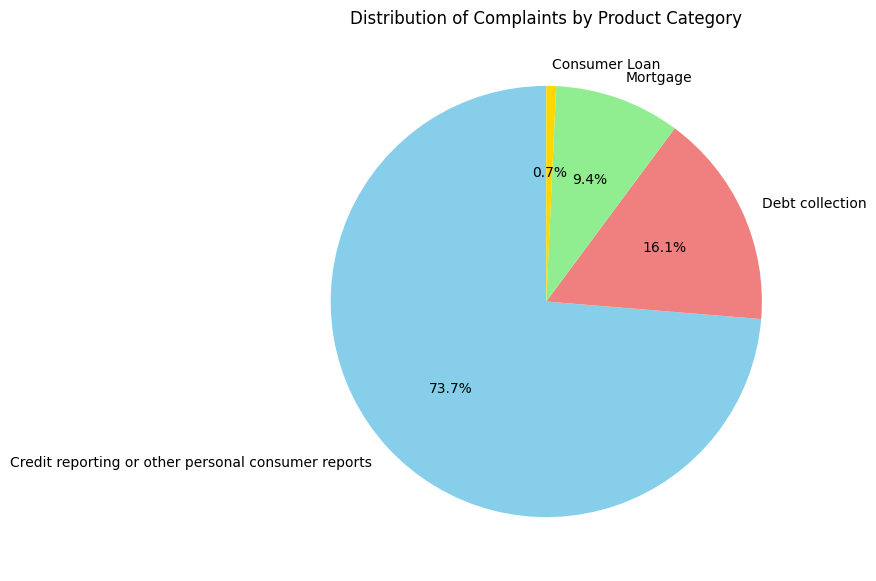

In [9]:
# Count Occurrences of Each Category Before Balancing
category_counts = df["Product"].value_counts()


plt.figure(figsize=(7, 7))
category_counts.plot.pie(autopct="%1.1f%%", startangle=90, colors=["skyblue", "lightcoral", "lightgreen", "gold"])
plt.ylabel("")
plt.title("Distribution of Complaints by Product Category")
plt.show()


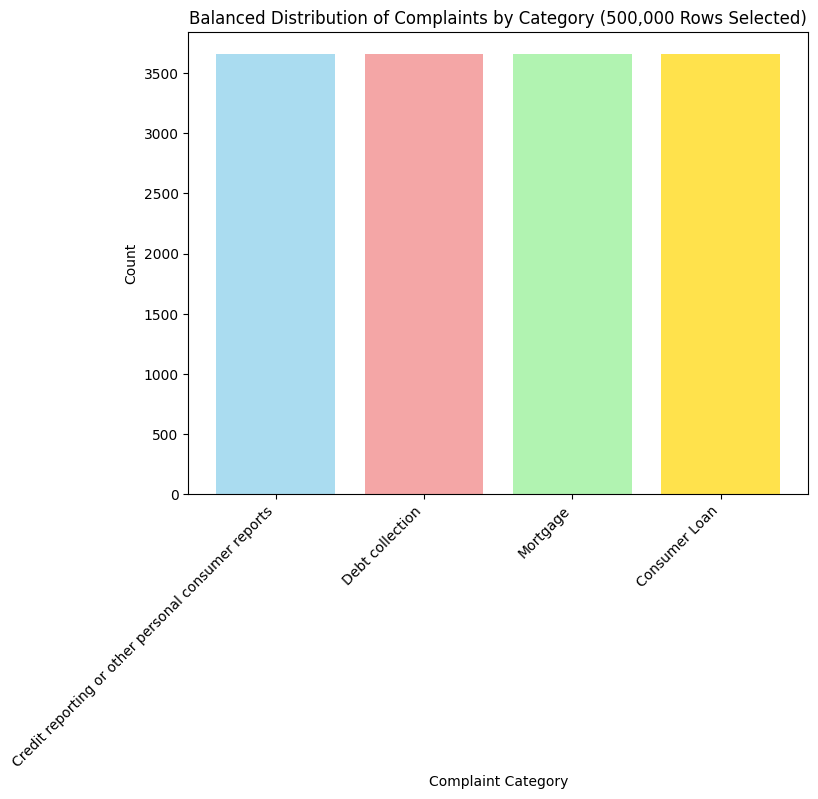

In [10]:
#Undersampling - Balance the Categories
min_count = category_counts.min()

balanced_df = pd.DataFrame()
for category in category_counts.index:
    category_subset = df[df["Product"] == category]
    category_sampled = resample(category_subset, replace=False, n_samples=min_count, random_state=42)
    balanced_df = pd.concat([balanced_df, category_sampled])

# Count Occurrences After Balancing
balanced_category_counts = balanced_df["Product"].value_counts()

# Bar Chart for Balanced Data
plt.figure(figsize=(8, 6))
plt.bar(balanced_category_counts.index, balanced_category_counts.values,  
        color=["skyblue", "lightcoral", "lightgreen", "gold"], alpha=0.7)

plt.xlabel("Complaint Category")
plt.ylabel("Count")
plt.title("Balanced Distribution of Complaints by Category (500,000 Rows Selected)")
plt.xticks(rotation=45, ha="right")
plt.show()


I defined a text preprocessing function, preprocess_text_simple(), to clean and normalize text data for classification. The function first checks if the input text is NaN and replaces it with an empty string to prevent errors. Next, it converts the text to lowercase to maintain uniformity. It then removes all special characters (\W) using regular expressions, replacing them with spaces. Additionally, it eliminates extra spaces using \s+, ensuring that words are properly spaced without unnecessary whitespace.

In [11]:
# Cell 10: Define Text Preprocessing Function
def preprocess_text_simple(text):
    if pd.isna(text):  # Handle missing values by converting NaN to empty string
        return ""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text




I then applied this preprocessing function to three text-based columns: "Issue," "Sub-issue," and "Consumer complaint narrative," creating cleaned versions of these columns: cleaned_issue, cleaned_sub_issue, and cleaned_narrative. These cleaned text columns are then combined into a single column, combined_text, where all relevant complaint details are merged into one input feature for the classification model.

In [12]:
# Apply Preprocessing to Text Columns (NaN values handled inside the function)
balanced_df["cleaned_issue"] = balanced_df["Issue"].apply(preprocess_text_simple)
balanced_df["cleaned_sub_issue"] = balanced_df["Sub-issue"].apply(preprocess_text_simple)
balanced_df["cleaned_narrative"] = balanced_df["Consumer complaint narrative"].apply(preprocess_text_simple)

# Combine Available Text Features into a Single Input Column
balanced_df["combined_text"] = (
    balanced_df["cleaned_issue"] + " " +
    balanced_df["cleaned_sub_issue"] + " " +
    balanced_df["cleaned_narrative"]
)

# Display Processed Data
balanced_df[["combined_text", "category"]].head()

,combined_text,category
6951240,incorrect information on your report account s...,0
3016148,incorrect information on your report account i...,0
7415180,improper use of your report reporting company ...,0
846241,incorrect information on your report informati...,0
7415364,incorrect information on your report informati...,0


In [13]:
#Split Data into Train and Test Sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    balanced_df["combined_text"], balanced_df["category"], test_size=0.2, random_state=42
)


In [14]:
print("Size of Training Set:", len(X_train))
print("Size of Test Set:", len(X_test))  


Size of Training Set: 11712
Size of Test Set: 2928


In [15]:
print("Total rows after filtering categories:", len(df))


Total rows after filtering categories: 500000


In [16]:
print("Category counts before undersampling:")
print(df["Product"].value_counts())


Category counts before undersampling:
Product
Credit reporting or other personal consumer reports    368501
Debt collection                                         80727
Mortgage                                                47112
Consumer Loan                                            3660
Name: count, dtype: int64


In [17]:
print("Total rows after balancing:", len(balanced_df))


Total rows after balancing: 14640


applied TF-IDF (Term Frequency-Inverse Document Frequency) Vectorization to convert the processed text data into numerical form for machine learning models

In [18]:

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


Logistic Regression Model

In [19]:

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_tfidf, y_train)

# Get Predictions
logistic_preds = logistic_model.predict(X_test_tfidf)


c:\Users\loges\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\loges\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       750
           1       0.98      0.99      0.99       721
           2       0.98      0.98      0.98       711
           3       0.99      0.98      0.98       746

    accuracy                           0.98      2928
   macro avg       0.98      0.98      0.98      2928
weighted avg       0.98      0.98      0.98      2928



c:\Users\loges\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\loges\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\loges\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\loges\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

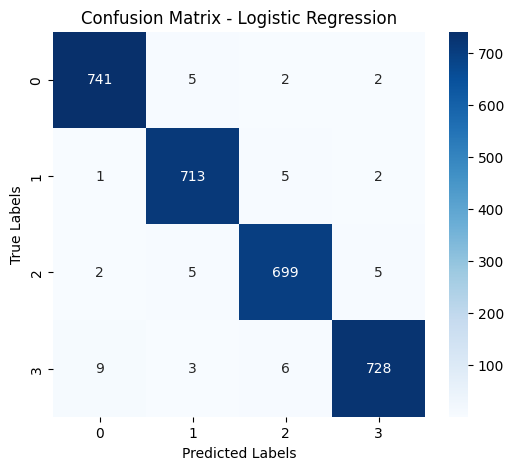

In [20]:
# Cell 14: Compute and Print Model Performance
print("Classification Report:\n", classification_report(y_test, logistic_preds))

# Compute the Confusion Matrix
conf_matrix = confusion_matrix(y_test, logistic_preds)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [22]:
# Cell 15: Function to Predict New Complaints using Logistic Regression
def predict_complaint(text):
    processed_text = preprocess_text_simple(text)  # Preprocess input text
    vectorized_text = tfidf_vectorizer.transform([processed_text])  # Convert to TF-IDF
    prediction = logistic_model.predict(vectorized_text)[0]  # Use Logistic Regression for prediction

    # Reverse Mapping to Get Category Name
    category_mapping_reverse = {v: k for k, v in product_mapping.items()}
    return category_mapping_reverse.get(prediction, "Unknown Category")

# Example Prediction
sample_text = """Taking out the loan or lease"""
print("Predicted Category Of Logistic Regression Model:", predict_complaint(sample_text))


Predicted Category Of Logistic Regression Model: Consumer Loan


Random Forest Classifier Model

In [23]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
rf_preds = rf_model.predict(X_test_tfidf)


c:\Users\loges\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\loges\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


c:\Users\loges\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\loges\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\loges\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\loges\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       750
           1       0.99      1.00      1.00       721
           2       1.00      1.00      1.00       711
           3       1.00      0.99      0.99       746

    accuracy                           0.99      2928
   macro avg       0.99      0.99      0.99      2928
weighted avg       0.99      0.99      0.99      2928



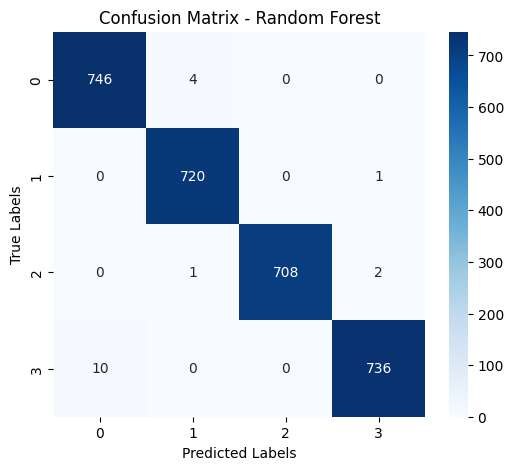

Predicted Category of Random Forest Classifier model: Debt collection


In [24]:
# Cell 12: Model Evaluation
print("Classification Report:\n", classification_report(y_test, rf_preds))
conf_matrix = confusion_matrix(y_test, rf_preds)

# Cell 13: Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Cell 14: Function to Predict New Complaints using Random Forest
def predict_complaint(text):
    processed_text = preprocess_text_simple(text)
    vectorized_text = tfidf_vectorizer.transform([processed_text])
    prediction = rf_model.predict(vectorized_text)[0]

    category_mapping_reverse = {v: k for k, v in product_mapping.items()}
    return category_mapping_reverse.get(prediction, "Unknown Category")

# Cell 15: Example Prediction
sample_text = """I received two notifications, via email -about this inquiry, I DO NOT know who or what this company is, Inquiry made on XXXX2017.  Never heard of this company!
Institution Information STATE FARM BANK XXXX XXXX XXXX XXXX XXXX, IL XXXX ( XXXX ) XXXX"""
print("Predicted Category of Random Forest Classifier model:", predict_complaint(sample_text))

Linear Support Vector Machine Model

In [25]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)
svm_preds = svm_model.predict(X_test_tfidf)


c:\Users\loges\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\loges\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       750
           1       0.98      0.99      0.99       721
           2       0.99      0.98      0.99       711
           3       0.99      0.98      0.99       746

    accuracy                           0.99      2928
   macro avg       0.99      0.99      0.99      2928
weighted avg       0.99      0.99      0.99      2928



c:\Users\loges\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\loges\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\loges\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\loges\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

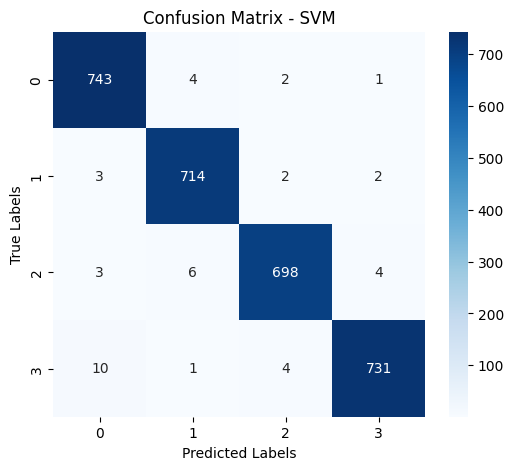

Predicted Category on inear Support Vector Machine Model: Mortgage


In [26]:
print("Classification Report:\n", classification_report(y_test, svm_preds))
conf_matrix = confusion_matrix(y_test, svm_preds)

# Cell 13: Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - SVM")
plt.show()

# Cell 14: Function to Predict New Complaints using SVM
def predict_complaint(text):
    processed_text = preprocess_text_simple(text)
    vectorized_text = tfidf_vectorizer.transform([processed_text])
    prediction = svm_model.predict(vectorized_text)[0]

    category_mapping_reverse = {v: k for k, v in product_mapping.items()}
    return category_mapping_reverse.get(prediction, "Unknown Category")

# Cell 15: Example Prediction
sample_text = """signed up with Level 1 law firm to debt relief and nothing over the last year and or more has ever been negotiated with
 my creditors so I have called several times now i have stopped service with them they mentioned that I should in XXXX 
days from now receive a check for a portion in escrow account but Fee 's are tied up in court lawsuit"""
print("Predicted Category on inear Support Vector Machine Model:", predict_complaint(sample_text))

Multinomial Naive Bayes Model

In [27]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_preds = nb_model.predict(X_test_tfidf)


c:\Users\loges\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\loges\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       750
           1       0.96      0.99      0.97       721
           2       0.99      0.96      0.98       711
           3       0.97      0.98      0.98       746

    accuracy                           0.98      2928
   macro avg       0.98      0.98      0.98      2928
weighted avg       0.98      0.98      0.98      2928



c:\Users\loges\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\loges\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\loges\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\loges\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

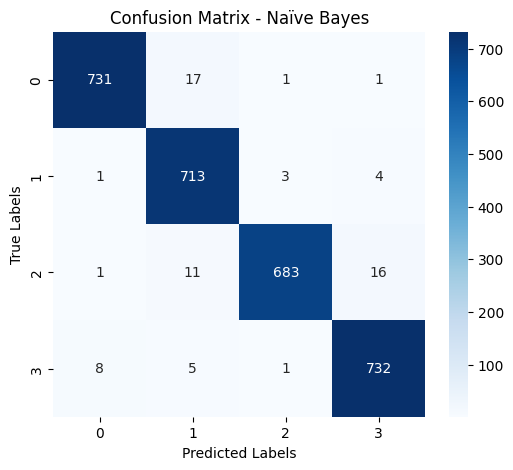

Predicted Category on Multinomial Naive Bayes Model: Mortgage


In [28]:
print("Classification Report:\n", classification_report(y_test, nb_preds))
conf_matrix = confusion_matrix(y_test, nb_preds)

# Cell 13: Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Naïve Bayes")
plt.show()

# Cell 14: Function to Predict New Complaints using Naïve Bayes
def predict_complaint(text):
    processed_text = preprocess_text_simple(text)
    vectorized_text = tfidf_vectorizer.transform([processed_text])
    prediction = nb_model.predict(vectorized_text)[0]

    category_mapping_reverse = {v: k for k, v in product_mapping.items()}
    return category_mapping_reverse.get(prediction, "Unknown Category")

# Cell 15: Example Prediction
sample_text = """Applying for a mortgage or refinancing an existing mortgage"""
print("Predicted Category on Multinomial Naive Bayes Model:", predict_complaint(sample_text))